1.What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.
>> Anomaly Detection is the process of identifying data points or patterns that deviate significantly from normal behavior.

Types of Anomalies

Point Anomaly
A single data point that is abnormal.
Example: A ₹5,00,000 transaction among mostly small purchases.

Contextual Anomaly
A data point that is abnormal in a specific context (time, season, condition).
Example: 30°C temperature in winter.

Collective Anomaly
A group of related data points that are abnormal together.
Example: Repeated failed login attempts indicating an attack.

2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.
>> Isolation Forest detects anomalies by isolating data points using random splits. Since anomalies are easier to isolate, they require fewer splits in the trees. It works well for large and high-dimensional datasets and is commonly used in fraud detection and system monitoring.

DBSCAN identifies anomalies as points that do not belong to any dense cluster. It groups closely packed points and labels sparse-region points as noise. It is suitable for spatial data, geolocation problems, and datasets with arbitrary-shaped clusters, but struggles with varying densities.

Local Outlier Factor (LOF) detects anomalies by comparing a point’s local density with that of its neighbors. A point is anomalous if its density is much lower than nearby points. It is best for local anomalies in datasets with varying densities, such as network traffic or sensor data.

3.What are the key components of a Time Series? Explain each with one
example.
>> Key Components of a Time Series

Trend:
The long-term upward or downward movement in the data.
Example: Gradual increase in monthly online sales over several years.

Seasonality:
Regular, repeating patterns at fixed intervals.
Example: Higher retail sales every festive season.

Cyclic Component:
Fluctuations occurring over longer, irregular periods.
Example: Business ups and downs due to economic cycles.

Irregular (Noise):
Random, unpredictable variations.
Example: Sudden drop in website traffic due to a server outage.

4.Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?
>> Stationarity in Time Series

A time series is stationary if its statistical properties remain constant over time, mainly:

Mean is constant

Variance is constant

Autocovariance does not depend on time

Stationarity is important because many time-series models (like ARIMA) assume stationarity.

Testing Stationarity

1.Visual Inspection
Plot the series to check for trend or changing variance.

2.Statistical Tests

i)ADF (Augmented Dickey–Fuller) test:
Null hypothesis → series is non-stationary

ii)KPSS test:
Null hypothesis → series is stationary

Transforming a Non-Stationary Series into Stationary

1.Differencing
Subtract previous values to remove trend.
Example: yt-yt-1

2.Log / Power Transformation
Stabilizes variance.
Example: log(sales)

3.Detrending / Deseasonalizing
Remove trend or seasonal components.

5.Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.
>> AR (Autoregressive)
Uses past values of the series to predict the current value.
Structure: Depends only on previous observations.
Application: Suitable when the data shows correlation with its own past values and is stationary.

MA (Moving Average)
Uses past error terms to model the current value.
Structure: Depends on past forecast errors.
Application: Useful when random shocks affect the series and the data is stationary.

ARIMA (Autoregressive Integrated Moving Average)
Combines AR and MA with differencing to handle non-stationary data.
Structure: AR + differencing (I) + MA.
Application: General-purpose model for univariate time series with trend but no seasonality.

SARIMA (Seasonal ARIMA)
Extends ARIMA by adding seasonal AR, MA, and differencing terms.
Structure: ARIMA + seasonal components.
Application: Used when data shows clear seasonal patterns (e.g., monthly sales).

SARIMAX (Seasonal ARIMA with Exogenous Variables)
Further extends SARIMA by including external variables.
Structure: SARIMA + exogenous (external) predictors.
Application: Forecasting influenced by both seasonality and external factors (e.g., sales affected by promotions or holidays).

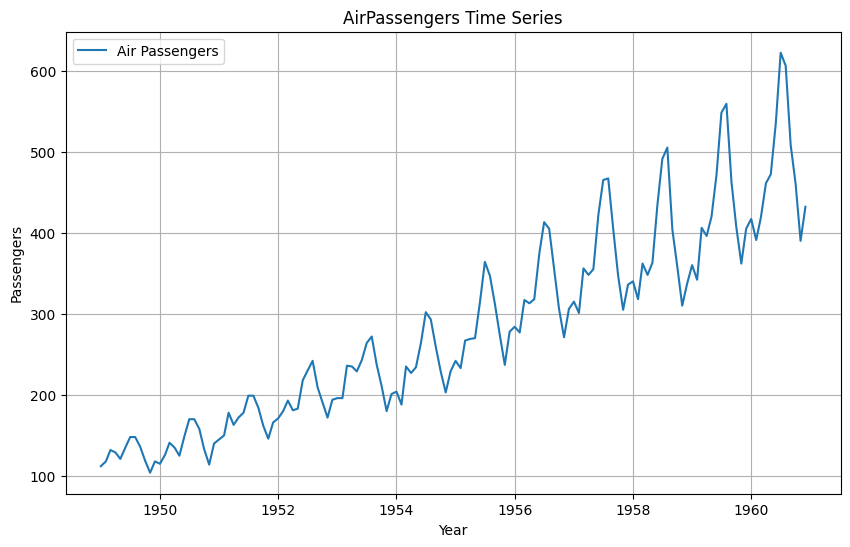

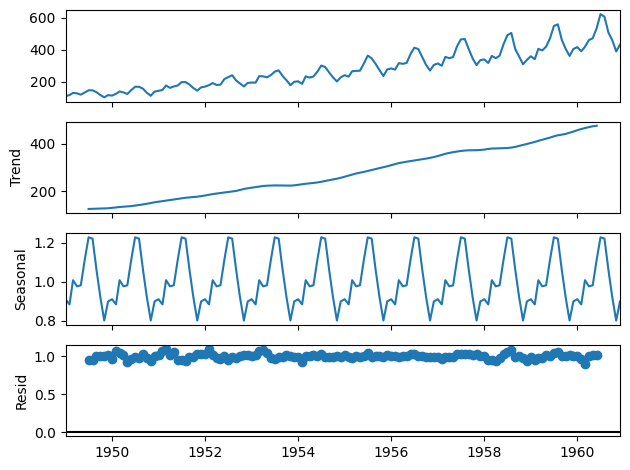

In [2]:
# 6. Load a time series dataset (e.g., AirPassengers), plot the original series,
# and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm # Changed: Import statsmodels.api

# Load AirPassengers dataset
# Original line: data = airpassengers.load_pandas().data
air_passengers_r = sm.datasets.get_rdataset("AirPassengers", "datasets")
df = air_passengers_r.data

# Convert the 'time' column to a proper DatetimeIndex
df['year'] = df['time'].astype(int)
df['month_float'] = df['time'] - df['year']
df['month_num'] = (df['month_float'] * 12).round().astype(int) + 1
df['month'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month_num'].astype(str).str.zfill(2), format='%Y-%m')

# Set the 'month' column as the index and select the 'value' column
data = df.set_index('month')['value'].rename('Passengers').to_frame()

# Plot original time series
plt.figure(figsize=(10, 6))
plt.plot(data, label='Air Passengers')
plt.title('AirPassengers Time Series')
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(data, model='multiplicative')

# Plot decomposition
decomposition.plot()
plt.show()

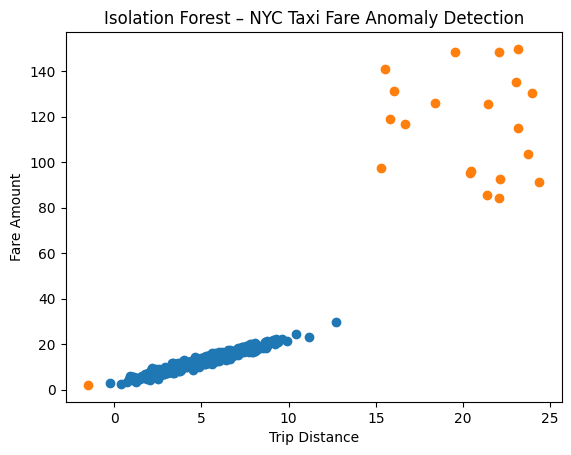

In [3]:
# 7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
# detect anomalies. Visualize the anomalies on a 2D scatter plot.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# -----------------------------
# 1. Create sample NYC Taxi Fare data
# -----------------------------
np.random.seed(42)
n_samples = 500

trip_distance = np.random.normal(loc=5, scale=2, size=n_samples)
fare_amount = 2.5 + trip_distance * 2 + np.random.normal(0, 1, n_samples)

# Inject anomalies
trip_distance_anom = np.random.uniform(15, 25, 20)
fare_amount_anom = np.random.uniform(80, 150, 20)

trip_distance = np.concatenate([trip_distance, trip_distance_anom])
fare_amount = np.concatenate([fare_amount, fare_amount_anom])

df = pd.DataFrame({
    "TripDistance": trip_distance,
    "FareAmount": fare_amount
})

# -----------------------------
# 2. Apply Isolation Forest
# -----------------------------
iso_forest = IsolationForest(contamination=0.04, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(df[["TripDistance", "FareAmount"]])

# -----------------------------
# 3. Separate normal points and anomalies
# -----------------------------
normal = df[df["Anomaly"] == 1]
anomalies = df[df["Anomaly"] == -1]

# -----------------------------
# 4. Visualize anomalies (2D scatter plot)
# -----------------------------
plt.figure()
plt.scatter(normal["TripDistance"], normal["FareAmount"])
plt.scatter(anomalies["TripDistance"], anomalies["FareAmount"])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest – NYC Taxi Fare Anomaly Detection")
plt.show()


/tmp/ipython-input-4282762671.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data["Date"] = pd.date_range(start="1949-01", periods=len(data), freq="M")
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


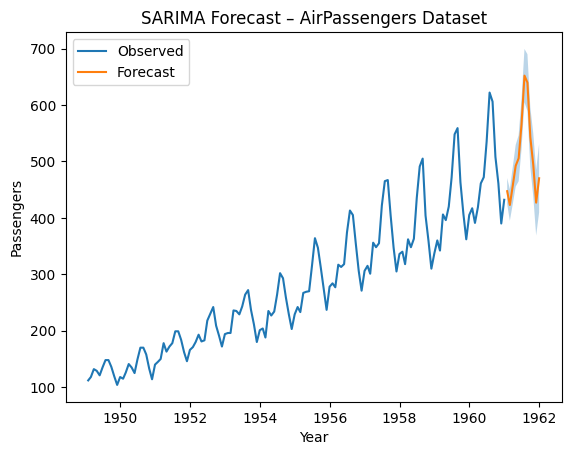

In [4]:
# 8. Train a SARIMA model on the monthly airline passengers dataset.
# Forecast the next 12 months and visualize the results.
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

# -----------------------------
# 1. Load AirPassengers dataset
# -----------------------------
data = get_rdataset("AirPassengers").data
data["Date"] = pd.date_range(start="1949-01", periods=len(data), freq="M")
data.set_index("Date", inplace=True)
data = data[["value"]]
data.columns = ["Passengers"]

# -----------------------------
# 2. Train SARIMA model
# (p,d,q) = (1,1,1)
# (P,D,Q,s) = (1,1,1,12)
# -----------------------------
model = SARIMAX(
    data,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()

# -----------------------------
# 3. Forecast next 12 months
# -----------------------------
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# -----------------------------
# 4. Visualization
# -----------------------------
plt.figure()
plt.plot(data, label="Observed")
plt.plot(forecast_mean, label="Forecast")
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    alpha=0.3
)
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.title("SARIMA Forecast – AirPassengers Dataset")
plt.legend()
plt.show()


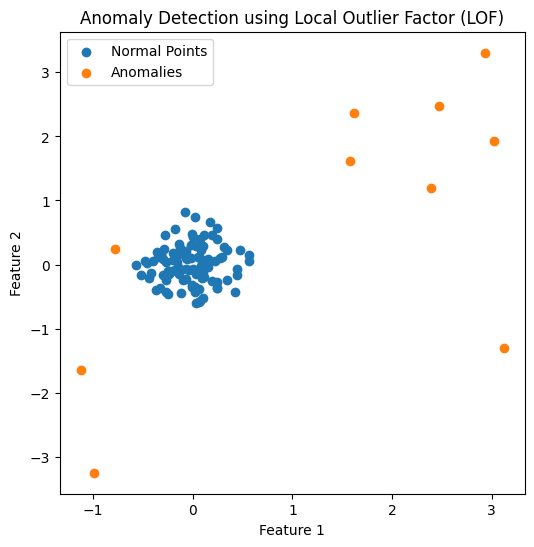

In [5]:
# 9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect
# anomalies and visualize them using matplotlib.
# (Include your Python code and output in the code box below.)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# -----------------------------
# Step 1: Create numerical data
# -----------------------------
np.random.seed(42)

# Normal data points
normal_data = 0.3 * np.random.randn(100, 2)

# Outliers
outliers = np.random.uniform(low=-4, high=4, size=(10, 2))

# Combine dataset
X = np.vstack((normal_data, outliers))

# -----------------------------
# Step 2: Apply LOF
# -----------------------------
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.09
)

y_pred = lof.fit_predict(X)
# 1  -> normal
# -1 -> anomaly

# Separate points
normal_points = X[y_pred == 1]
anomalies = X[y_pred == -1]

# -----------------------------
# Step 3: Visualization
# -----------------------------
plt.figure(figsize=(6, 6))
plt.scatter(
    normal_points[:, 0],
    normal_points[:, 1],
    label="Normal Points"
)
plt.scatter(
    anomalies[:, 0],
    anomalies[:, 1],
    label="Anomalies"
)
plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


10.  You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?


>> 1.Data Ingestion:

Collect streaming energy consumption data every 15 minutes with features: timestamp, region, weather conditions, energy usage.

2.Feature Engineering:

Create time-based features: hour, day of week, weekend/holiday.

Include weather features as exogenous variables.

3.Anomaly Detection:

Use Isolation Forest to detect abnormal spikes/drops in real-time.

Retrain periodically using a sliding window of recent data.

Generate alerts for anomalies.

4.Short-Term Forecasting:

Use SARIMAX to predict energy demand for next few hours or day.

Include exogenous variables like temperature, weather, and region.

5.Validation & Monitoring:

Forecast: MAE, RMSE, MAPE using time-based splits.

Anomaly detection: precision and recall using historical labels.

Monitor for drift; retrain when performance drops.

6.Business Action:

Alerts for unusual spikes/drops.

Forecasts for load balancing, energy procurement, and preventive maintenance.


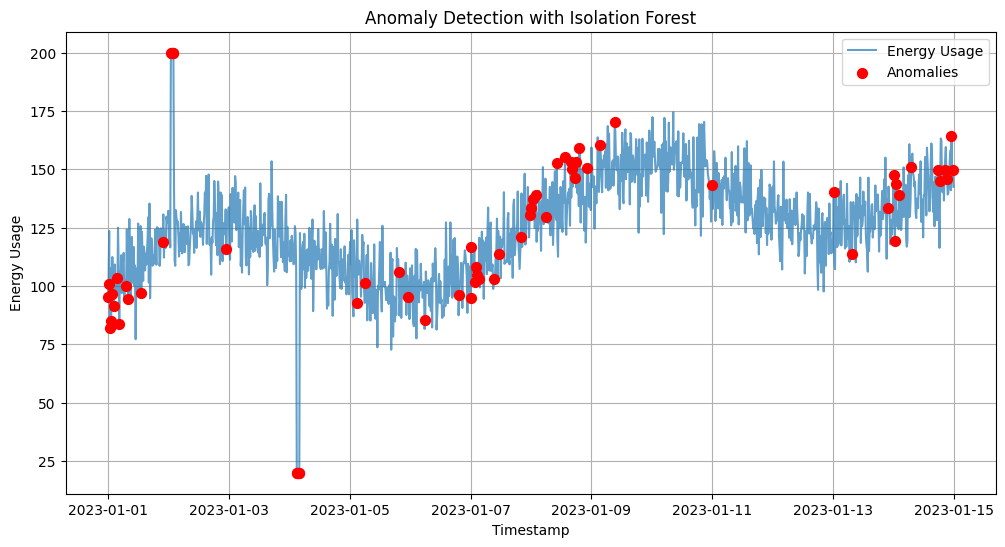

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# -----------------------------
# Create a dummy dataset for demonstration
# -----------------------------
n_samples = 7 * 96 * 2 # 2 weeks of 15-minute data
timestamps = pd.date_range(start='2023-01-01', periods=n_samples, freq='15min')
energy_usage = np.random.normal(loc=100, scale=10, size=n_samples)
temperature = np.random.normal(loc=20, scale=5, size=n_samples)

# Inject some seasonal patterns and a trend
energy_usage = energy_usage + 20 * np.sin(np.linspace(0, 4 * np.pi, n_samples)) # Daily seasonality
energy_usage = energy_usage + np.linspace(0, 50, n_samples) # Upward trend

# Inject some anomalies
energy_usage[100:105] = 200 # Spike
energy_usage[300:305] = 20 # Drop

df = pd.DataFrame({
    'timestamp': timestamps,
    'region': 'Region A',
    'temperature': temperature,
    'weather': 'Sunny',
    'energy_usage': energy_usage
})

# df.to_csv("energy_data.csv", index=False) # Uncomment to save the dummy data

# -----------------------------
# Load dataset (example CSV) - now using the generated df
# -----------------------------
# df should have columns: timestamp, region, temperature, weather, energy_usage
df.set_index("timestamp", inplace=True)

# -----------------------------
# Feature Engineering
# -----------------------------
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

features = ['energy_usage', 'temperature', 'hour', 'day_of_week', 'is_weekend']

# -----------------------------
# 1. Anomaly Detection with Isolation Forest
# -----------------------------
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(df[features])
# -1 = anomaly, 1 = normal

# Plot anomalies
plt.figure(figsize=(12,6))
plt.plot(df.index, df['energy_usage'], label="Energy Usage", alpha=0.7)
plt.scatter(df.index[df['anomaly']==-1], df['energy_usage'][df['anomaly']==-1], color='red', label="Anomalies", s=50, zorder=2)
plt.xlabel("Timestamp")
plt.ylabel("Energy Usage")
plt.title("Anomaly Detection with Isolation Forest")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 2. Short-Term Forecasting with SARIMAX
# -----------------------------
# Use last 7 days for example
train = df['energy_usage'][-7*96:]  # 96 points/day for 15-min intervals
exog = df[['temperature', 'is_weekend']][-7*96:]

# SARIMAX: order=(p,d,q), seasonal_order=(P,D,Q,s)
# Adjust seasonal_order 's' parameter if 96 points/day is the seasonal period (24 hours * 4 15-min intervals)
model = SARIMAX(train, exog=exog, order=(1,0,1), seasonal_order=(1,1,1,96), enforce_stationarity=False, enforce_invertibility=False)
sarimax_result = model.fit(disp=False)

# Forecast next 24 hours (96 points)
# Ensure future_exog matches the forecast steps
future_exog = df[['temperature', 'is_weekend']].iloc[-96:] # Take the last 96 entries for future exog
forecast = sarimax_result.get_forecast(steps=96, exog=future_exog)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label="Observed")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color='green')
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='green', alpha=0.2, label='Confidence Interval'
)
plt.xlabel("Timestamp")
plt.ylabel("Energy Usage")
plt.title("Short-Term Energy Forecasting with SARIMAX")
plt.legend()
plt.grid(True)
plt.show()